In [21]:
from ucimlrepo import fetch_ucirepo 
from IPython.display import display
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [66]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 

# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

# metadata 
print("============================== metadata ============================== ")
print(adult.metadata) 
  
# variable information 
print("============================== variables ============================== ")
print(adult.variables) 

============================== metadata ============================== 
{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reas

In [67]:
df=X.join(y)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
display(df)
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
df = df.drop(categorical_cols, axis=1)
display(df)
print(df.info())
print(df.shape)
print(df.loc[0, 'income'])
print(type(df.loc[0, 'income']))
df["income"] = [1 if ">50K" in x else 0 for x in df.income]
display(df)

y1 = df.iloc[:,-1:]
X1 = df.iloc[:,1:-1]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,77516,13,2174,0,40,<=50K
1,50,83311,13,0,0,13,<=50K
2,38,215646,9,0,0,40,<=50K
3,53,234721,7,0,0,40,<=50K
4,28,338409,13,0,0,40,<=50K
...,...,...,...,...,...,...,...
48836,33,245211,13,0,0,40,<=50K.
48837,39,215419,13,0,0,36,<=50K.
48839,38,374983,13,0,0,50,<=50K.
48840,44,83891,13,5455,0,40,<=50K.


<class 'pandas.core.frame.DataFrame'>
Index: 47592 entries, 0 to 48841
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47592 non-null  int64 
 1   fnlwgt          47592 non-null  int64 
 2   education-num   47592 non-null  int64 
 3   capital-gain    47592 non-null  int64 
 4   capital-loss    47592 non-null  int64 
 5   hours-per-week  47592 non-null  int64 
 6   income          47592 non-null  object
dtypes: int64(6), object(1)
memory usage: 2.9+ MB
None
(47592, 7)
<=50K
<class 'str'>


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...
48836,33,245211,13,0,0,40,0
48837,39,215419,13,0,0,36,0
48839,38,374983,13,0,0,50,0
48840,44,83891,13,5455,0,40,0


In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state=2)

In [70]:
train_accuracies = []
test_accuracies = []
depths = range(1, 51) 

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=2)
    clf.fit(X_train, Y_train)
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

Text(0, 0.5, 'Classifier Accuracy')

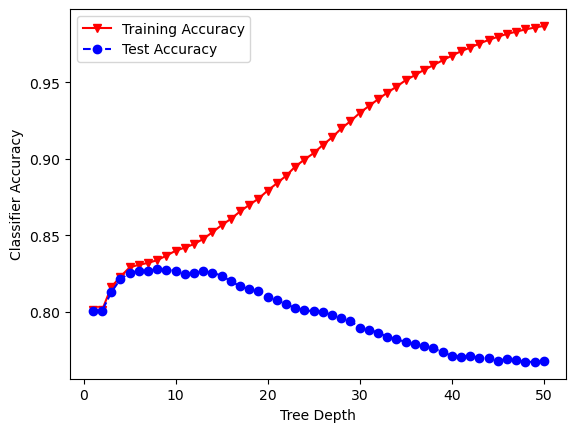

In [71]:
plt.plot(depths, train_accuracies, 'rv-', depths, test_accuracies, 'bo--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Tree Depth')
plt.ylabel('Classifier Accuracy')
# 6